In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
#Lectura de ñps 3csv's
reviews = 'dfReviewsLimpio.csv'
items = 'dfItemsLimpio.csv'
steamGames= 'steamGamesLimpio.csv'
dfReviews = pd.read_csv(reviews)
dfItems = pd.read_csv(items)
dfSteamGames = pd.read_csv(steamGames)

#EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
dfItems

,user_id,items_count,steam_id,item_id,item_name,playtime_2weeks,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,0,6
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,0,7
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,7,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [12]:
dfItems= dfItems[['item_id','item_name','playtime_forever']]
dfItems


,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
1,20,Team Fortress Classic,0
2,30,Day of Defeat,7
3,40,Deathmatch Classic,0
4,50,Half-Life: Opposing Force,0
...,...,...,...
5153204,346330,BrainBread 2,0
5153205,373330,All Is Dust,0
5153206,388490,One Way To Die: Steam Edition,3
5153207,521570,You Have 10 Seconds 2,4


In [15]:
dfReviews = dfReviews[['item_id' ,'reviews.helpful','reviews.recommend','sentimiento']]
Nuevo = pd.merge(dfReviews, dfItems, on='item_id', how='inner')


In [ ]:
#Merge
dataFrame = pd.merge(dfItemsGroupItemIdF1, dfSteamGames, on='item_id', how='inner')

In [6]:
dfSteamGames

,genres,title,release_date,item_id,years
0,Action,Lost Summoner Kitty,2018-01-04,761140,2018
1,Casual,Lost Summoner Kitty,2018-01-04,761140,2018
2,Indie,Lost Summoner Kitty,2018-01-04,761140,2018
3,Simulation,Lost Summoner Kitty,2018-01-04,761140,2018
4,Strategy,Lost Summoner Kitty,2018-01-04,761140,2018
...,...,...,...,...,...
70697,Indie,Russian Roads,2018-01-04,610660,2018
70698,Racing,Russian Roads,2018-01-04,610660,2018
70699,Simulation,Russian Roads,2018-01-04,610660,2018
70700,Casual,EXIT 2 - Directions,2017-09-02,658870,2017


In [ ]:
dfSteamGames['item_id','genres'].info()

In [9]:
#Tipos de variables:
# genres = Categorica 
#Title = Categorica
# Release date = Tiempo, asociada a la fecha exact de publicacion en formato yyyy mm dd
# Year = Numerica asociado al año

# Estadistica Descriptiva


In [26]:
agruGameItems = pd.merge(dfSteamGames, dfItems, on='item_id', how='left')
agruTotal = pd.merge(agruGameItems,dfReviews,on='item_id', how='left')

In [23]:
agruGameItems

NameError: name 'agruGameItems' is not defined

In [ ]:
agruTotal

In [ ]:
itemsSteamGamesF1

# Podemos ver la cantindad de juegos por cada año por tipo de genero que se dieron 

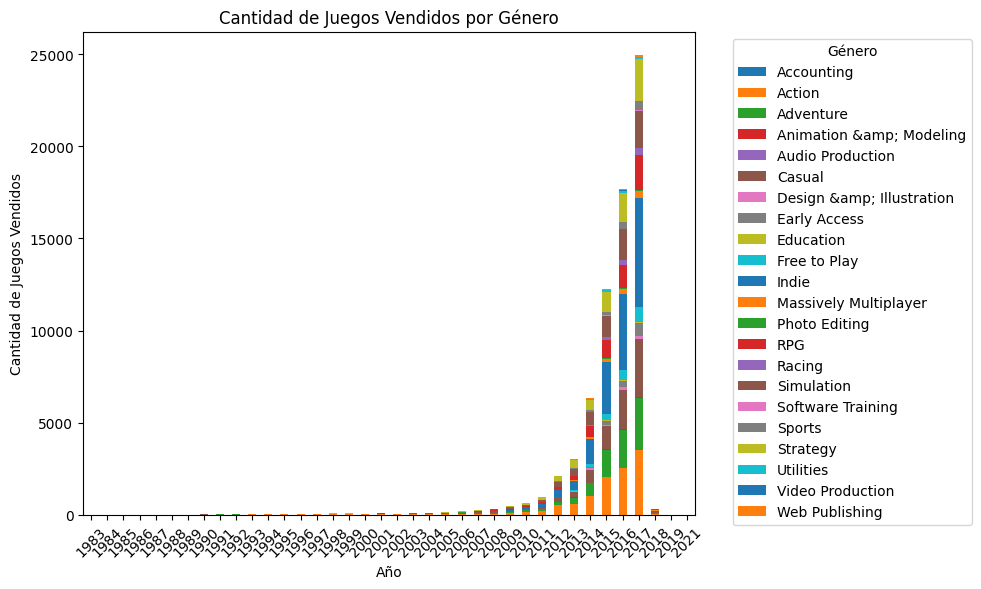

In [19]:
conteo_por_genero_y_año = dfSteamGames.groupby(['years', 'genres']).size().unstack(fill_value=0)

# Creamos el gráfico de barras apiladas
ax = conteo_por_genero_y_año.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizamos el gráfico
plt.title('Cantidad de Juegos Vendidos por Género')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Vendidos')
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
dfReviews

,user_id,reviews.funny,reviews.posted,reviews.last_edited,item_id,reviews.helpful,reviews.recommend,sentimiento,yearsReviews
0,76561197970982479,0,2011-11-05,NaN,1250,NaN,1,2,2011
1,76561197970982479,0,2011-07-15,NaN,22200,NaN,1,2,2011
2,76561197970982479,0,2011-04-21,NaN,43110,NaN,1,2,2011
3,js41637,0,2014-06-24,NaN,251610,0.75,1,2,2014
4,js41637,0,2013-09-08,NaN,227300,0.00,1,2,2013
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,0,2012-07-10,NaN,70,NaN,1,2,2012
59301,76561198312638244,0,2012-07-08,NaN,362890,NaN,1,2,2012
59302,LydiaMorley,1,2012-07-03,NaN,273110,0.50,1,2,2012
59303,LydiaMorley,0,2012-07-20,NaN,730,NaN,1,2,2012


In [8]:
dfItems

,user_id,items_count,steam_id,item_id,item_name,playtime_2weeks,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,0,6
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,0,7
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,7,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [ ]:
def recomendacion_juego(product_id, df1, df2, num_recomendaciones=5):
    # Filtrar el DataFrame df1 para obtener la información del juego con el ID de producto proporcionado
    juego_seleccionado = df1[df1['product_id'] == product_id]

    # Obtener características relevantes del juego seleccionado (por ejemplo, género, duración, etc.)
    características_juego = juego_seleccionado[['genre', 'duration', 'otra_caracteristica']]

    # Filtrar el DataFrame df1 para juegos con características similares
    juegos_similares = df1[
        (df1['genre'] == características_juego['genre'].values[0]) &
        (df1['duration'] == características_juego['duration'].values[0]) &
        (df1['otra_caracteristica'] == características_juego['otra_caracteristica'].values[0]) &
        (df1['product_id'] != product_id)  # Excluir el juego seleccionado
    ]

    # Tomar las primeras "num_recomendaciones" filas como recomendaciones
    recomendaciones = juegos_similares.head(num_recomendaciones)

    return recomendaciones

# Ejemplo de uso:
producto_id = 'ID_DEL_JUEGO'
resultados_recomendados = recomendacion_juego(producto_id, df1, df2)
print(resultados_recomendados)